## Poly Regression (çoklu regresyon)

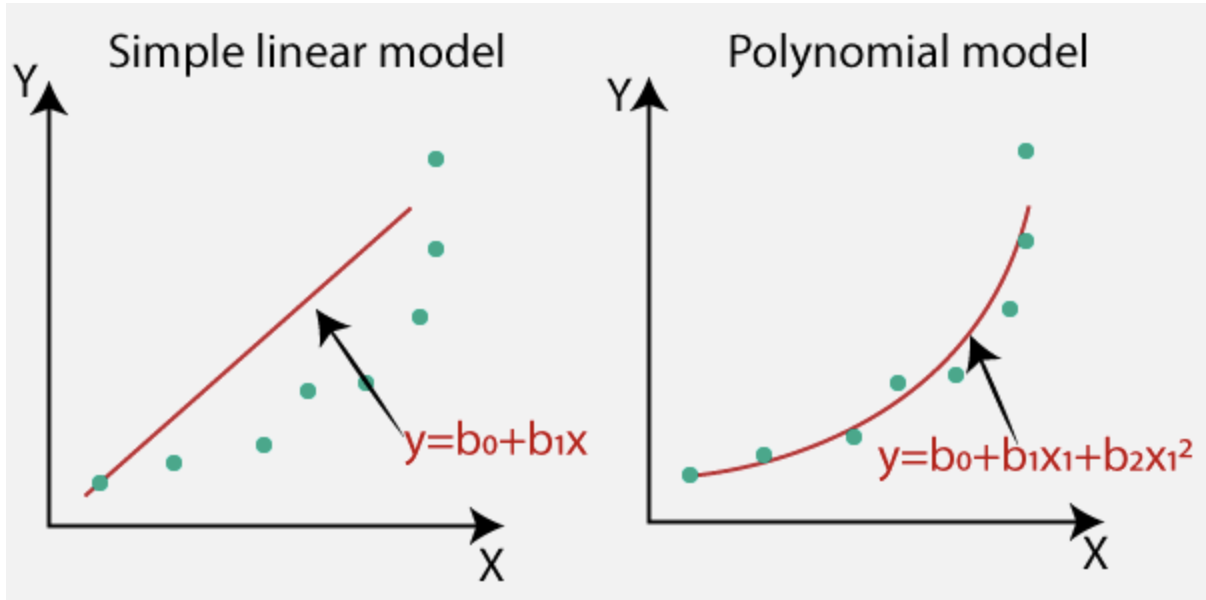
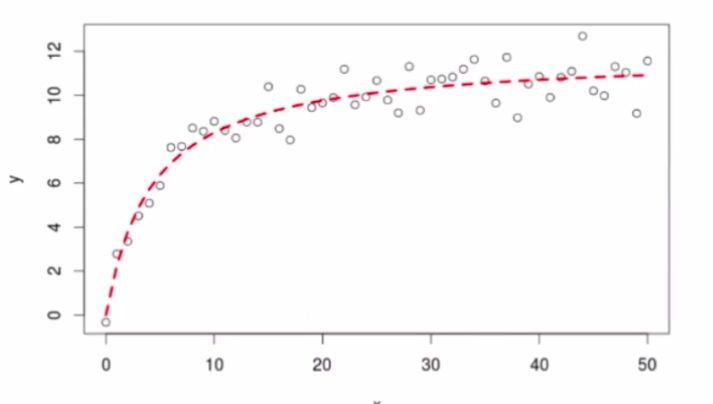
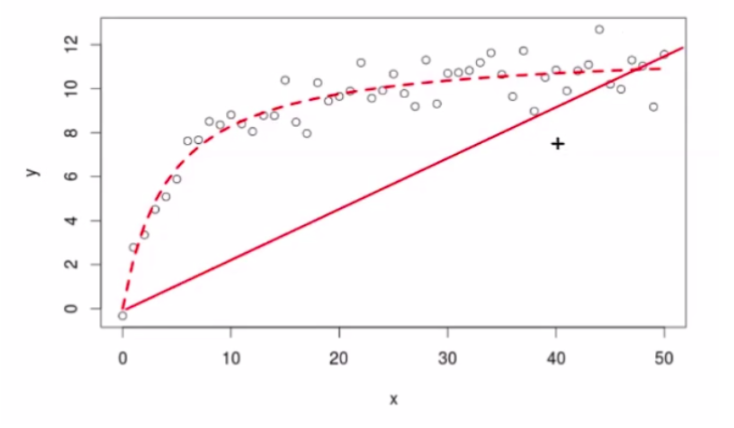

* Polinom Regresyon , bağımsız değişkenler ile bağımlı değişkenler arasındaki ilişkinin n'inci derece polinomda modellendiği bir regresyon analizi şeklidir.
    - Types of polinomials
    - 1st degree ---> linear    b1x + b0
    - 2nd degree ---> Quadratic b2x**2 + b1x + b0 2.derece
    - 3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0 3.derece

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
from sklearn.preprocessing import PolynomialFeatures

## Polynomial Features

In [4]:
trans = PolynomialFeatures(degree= 2, include_bias =False) 
# data yı 2 dereceden Polynomial Features üreteceğim

In [7]:
data = np.array([[2,3,4]])
print(data)

[[2 3 4]]


In [6]:
trans.fit(data)

PolynomialFeatures(include_bias=False)

In [8]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [10]:
trans.fit_transform(data) #yukarıdaki kodların ikisinin birleşimi

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

* degree 3 yapınca hem feature sayısı artıyor hemde işlemin yorumlanması zorlaşıyor işler karmaşıklaşıyor
* 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

In [12]:
df = pd.read_csv("Advertising.csv")

In [13]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [14]:
X = df.drop("sales", axis =1)
y = df.sales

In [15]:
poly_conv = PolynomialFeatures(degree= 2 , include_bias = False)

In [16]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [17]:
poly_features =poly_conv.transform(X) #Polynomial feaure çevirdik

In [18]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [19]:
poly_features.shape

(200, 9)

In [20]:
pd.DataFrame(poly_features, columns =["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()
# yeni feature leri df ile yeni isin verdik df olarak return ettik

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


# Train | Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size= 0.3, random_state= 101)
# X olarak yeni oluşturduğum poly_features datasını veriyoruz.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model_poly = LinearRegression()

In [27]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = model_poly.predict(X_test)

In [29]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)


,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


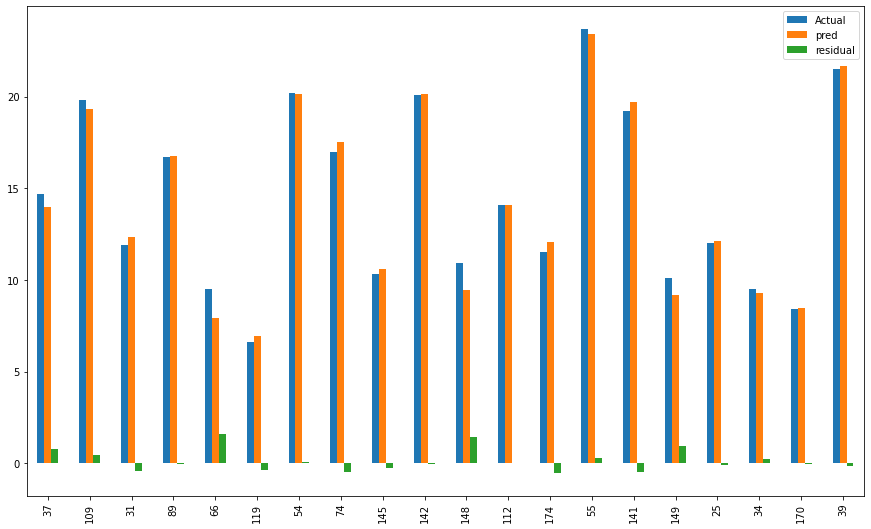

In [30]:
compare.head(20).plot(kind="bar", figsize=(15,9))
plt.show();

In [31]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [32]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [33]:
df_coef 

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [34]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])